<a href="https://colab.research.google.com/github/johanhoffman/DD2363-VT19/blob/jledeus/Lab-6/jledeus-lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 6: Partial differential equations**
**Johan Ledéus**

# **Introduction**

Homework 6 for DD2363 Methods in Scientific Computing


# Methods

## Mandatory assignments

###1. Function: FEM for $1D$ boundary value problem $-u''(x) = f(x), u(0)=u(1)=0$ 

####Input: function $f(x)$, $1D$ mesh with nodes $(x0,...,xn)$
####Output: vector of FEM solution $U(x)$ evaluated in $(x0,...,xn)$ 
####Test: verify accuracy and convergence rate against exact/manufactured solution

#### Solution
Given the input above with the boundary conditions we can use Galerkin finite element method (16.2). Meaning that we want to find $U \in V_h$ such that:


$$\int_o^1-U^{''}(x)v(x)dx = \int_0^1f(x)v(x)dx$$


With partial integration we can write the left hand side as:

$$\int_0^1U'(x)v'(x)dx = \int_0^1f(x)v(x)dx$$

And this problem can be discretized with continious piecewise linear functions over a mesh (*The discrete problem in the course literature*).

$$\sum_{j=1}^{n}U_j\int_0^1\phi_j^´\phi_i^´dx = \int_0^1f(x)\phi_i(x)dx, i=1,..,n$$
 
This can be rewritten as a system of equations $Sx=b$ 

where $s_{i,j} = (\phi_j,\phi_i)$, $x_j=U_j$, and $b_i = (f,\phi_i)$

With everything in place we construct the stiffness matrix $S$

$$s_{i,i} = \frac{1}{h_i} + \frac{1}{h_{i+1}}$$

$$s_{i,i+1} = - \frac{1}{h_{{i+1}}}$$

$$s_{i,i-1} = -\frac{1}{h_i}$$

To solve the equation $Sx=b$ we can use least squares.




In [0]:
import numpy as np

def fem_bvp(f,mesh):
  # calculate the distance between each discretized mesh value
  h = []
 
  for i in range(len(mesh)-1):
    h.append((mesh[i+1]-mesh[i]))
  h.append(h[-1])

  # Calculate Stiffnes matrix  
  S = np.zeros((len(h), len(h)))
  
  S[-1,-1] = 1/h[-1]
  S[0,0] = 1/h[0]
  S[-1,len(S)-2] -= 1/h[-1]
  
  for i in range(len(h)-1):
    S[i,i] += 1/h[i+1]
    S[i+1,i+1] += 1/h[i+1]
    S[i,i+1] -= 1/h[i+1]
    if i != 0:
      S[i,i-1] -= 1/h[i]
      
  # Load vector
  b = []
  for i in range(len(mesh)):
    b.append(-f(mesh[i])*h[i])
   
  # Solve equation
  x = np.linalg.lstsq(S,b, rcond=None)[0]
  
  return S, x, b

# Results

###1. Function: FEM for $1D$ boundary value problem $-u''(x) = f(x), u(0)=u(1)=0$ 

####Test: verify accuracy and convergence rate against exact/manufactured solution

The plots below shows the approximation with the exact function on different time steps. For the convergence I used Mean Square error over the different step size.



---



For the first test I used: 
$$u''(x) = 20, u(0) = u(1) = 0$$
with the solution:
$$u(x) = 10(x-1)x$$

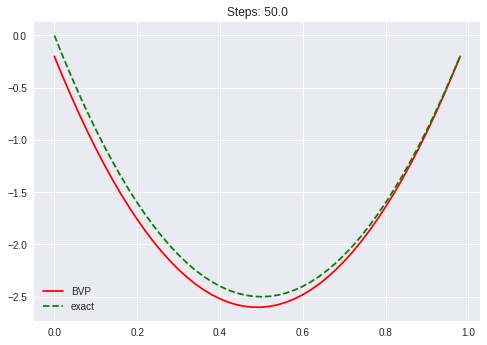

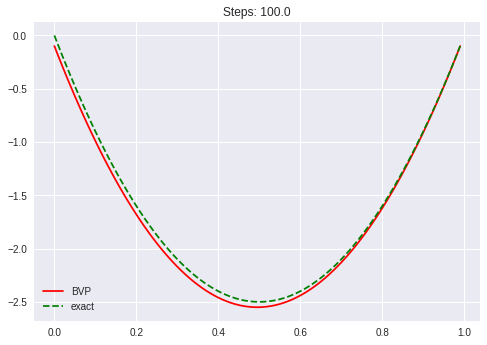

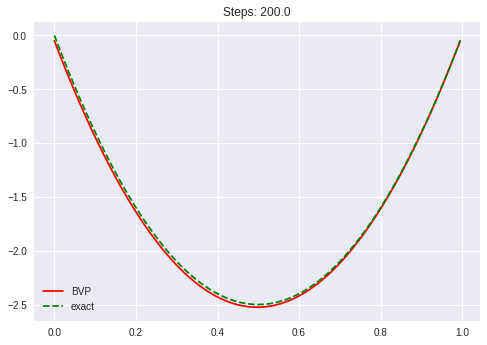

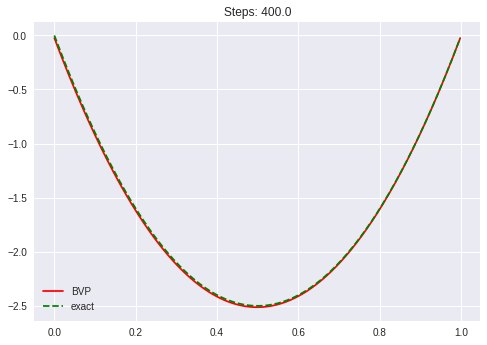

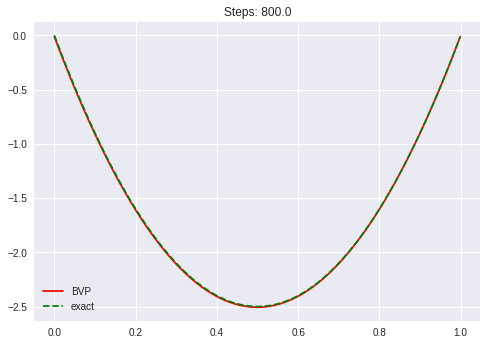

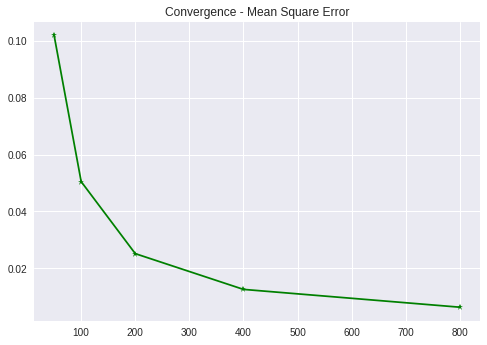

In [2]:
import matplotlib.pyplot as plt


def plot_helper(f,F,x):
  a = str('Steps: ') + str(1/x)
  mesh = np.arange(0, 1, x)
  S,x,b = fem_bvp(f,mesh)
  plt.plot(mesh, x, 'r')
  real_x =  [F(x) for x in mesh]
  plt.plot(mesh,real_x, 'g--')
  plt.legend(('BVP','exact'))
  
  plt.title(a)
  plt.show()
  
  res = 0
  for i in range(len(x)):
    res += np.abs(x[i]-real_x[i])
  return res / len(x) 


error = []
f = lambda x : 20
F = lambda x: 10*(x-1)*x
steps = [0.02,0.02/2,0.02/4,0.02/8,0.02/16]

for x in steps:
  error.append(plot_helper(f,F,x))
  
plt.plot([1/x for x in steps], error, 'g*-')
plt.title('Convergence - Mean Square Error')
plt.show()


For the second test i used the following:

$$u'' = -sin(x)cos(x), u(0) = u(1) = 0$$
$$u = \frac{1}{8}(sin(2x) - xsin(2))$$

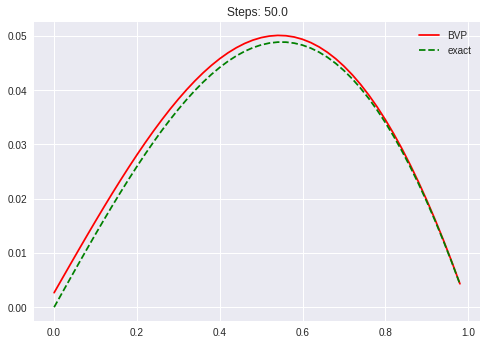

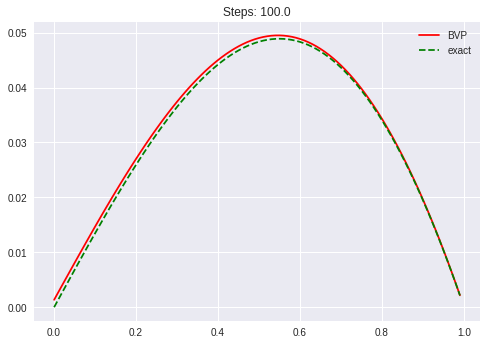

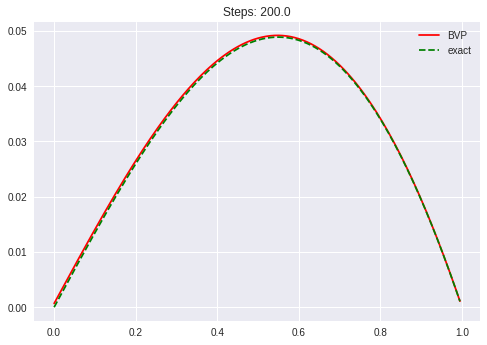

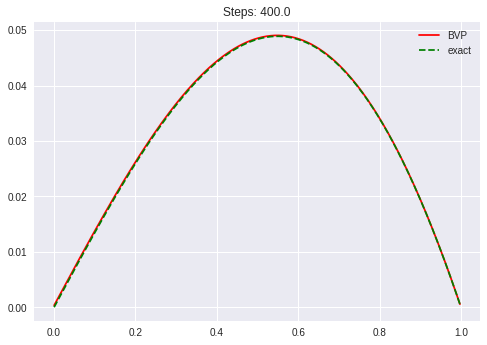

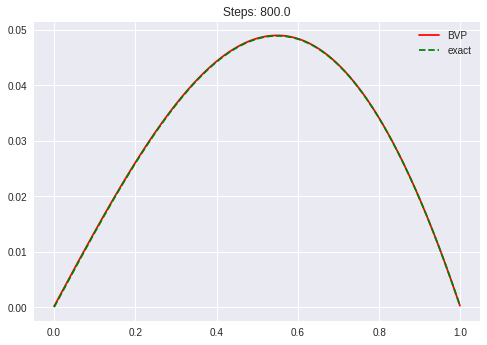

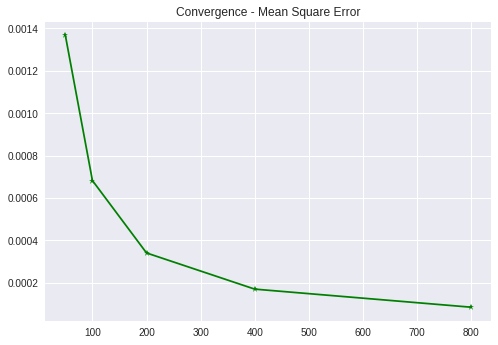

In [3]:

error = []
f = lambda x : -np.sin(x)*np.cos(x)
F = lambda x: (1/8) * (np.sin(2*x) - x*np.sin(2))

steps = [0.02,0.02/2,0.02/4,0.02/8,0.02/16]

for x in steps:
  error.append(plot_helper(f,F,x))
  
plt.plot([1/x for x in steps], error, 'g*-')
plt.title('Convergence - Mean Square Error')
plt.show()


# Discussion

The results for this lab was expected when I used a higher "precision" of the discretization. But for me it can be difficult to fully analyze differential equations since I haven't taken a course about them. That was one of the reasons I didn't do the extra assignments since it would be way too time consuming to fully understand.